# Objective
1. function to find h
2. function to generate list of candidates using hill climb
3. function to find the minimum h given n

# function to find h

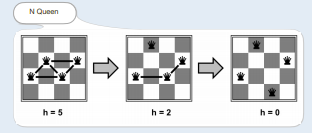

In [ ]:
#to find h value (h=0 is the best)
def heuristic(x):
    h = 0 
    for i in range(len(x)):
      for j in range(i+1,len(x)):
        if x[i] == x[j]:
          h += 1
        if abs(x[i]-x[j]) == abs(i-j):
          h += 1
    return h

In [ ]:
print(heuristic([2,3,2,3]))

5


In [ ]:
print(heuristic([2,4,2,3]))

2


In [ ]:
print(heuristic([2,4,1,3]))

0


In [ ]:
import random
n=6
current=[int(random.random()*n) for i in range(n)]
print(current)

[4, 0, 4, 0, 4, 5]


# hill climb function to list possible candidates

In [ ]:
#list of candidate (using hill climb)
def gen_successor(current):
  out=[]
  for i in range(len(current)):
    kk=list(current)

    #value = 0 : +1
    if kk[i] == 0  :
      kk[i]=kk[i]+1
      out.append(kk)

    #value = n : -1
    elif kk[i]== len(kk)-1 :
      kk[i]=kk[i]-1
      out.append(kk)

    #else : +1 and - 1
    else:
      kk[i]=kk[i]+1
      out.append(kk)
      kk=list(current)
      kk[i]=kk[i]-1
      out.append(kk)
  return out

In [ ]:
print(gen_successor(current))

[[5, 0, 4, 0, 4, 5], [3, 0, 4, 0, 4, 5], [4, 1, 4, 0, 4, 5], [4, 0, 5, 0, 4, 5], [4, 0, 3, 0, 4, 5], [4, 0, 4, 1, 4, 5], [4, 0, 4, 0, 5, 5], [4, 0, 4, 0, 3, 5], [4, 0, 4, 0, 4, 4]]


In [ ]:
def find_best_successor(ll):
  minn=list()
  lol=9999
  for i in ll:
    if heuristic(i)<lol:
      minn=i
      lol=heuristic(i)
  return minn

In [ ]:
find_best_successor(gen_successor(current))

[4, 0, 3, 0, 4, 5]

# finding the minimum h given n = 6

In [ ]:
#loop to find the minimum h

n=6
current=[int(random.random()*n) for i in range(n)]

count=0 #to limit time
iteration=0 #to count iteration
rec_iter=[]
rec_h=[]
while True:
  successors = gen_successor(current)
  best_successor = find_best_successor(successors)
  if count>1000:
    print('too many rounds')
    break
  elif heuristic(best_successor) == 0:
    print('best='+str(heuristic(best_successor)))
    print(best_successor)
    iteration+=1
    rec_iter.append(iteration)
    rec_h.append(heuristic(best_successor))
    break
  elif heuristic(best_successor)<heuristic(current):
    current = list(best_successor)
    print('current='+str(heuristic(current)))
    print(current)
    iteration+=1
    rec_iter.append(iteration)
    rec_h.append(heuristic(best_successor))
  else:
    # to prevent the same candidate
    n=6
    current=[int(random.random()*n) for i in range(n)]
    print('new current', current)
    count+=1
    iteration+=1
    rec_iter.append(iteration)
    rec_h.append(heuristic(current))
print('iteration='+str(iteration))

current=5
[5, 5, 2, 2, 3, 1]
current=4
[5, 5, 2, 1, 3, 1]
current=2
[5, 5, 2, 0, 3, 1]
current=1
[5, 4, 2, 0, 3, 1]
new current [0, 5, 1, 3, 2, 5]
current=3
[0, 5, 1, 4, 2, 5]
current=2
[0, 4, 1, 4, 2, 5]
current=1
[0, 3, 1, 4, 2, 5]
new current [4, 3, 3, 2, 2, 0]
current=5
[4, 3, 3, 2, 2, 1]
new current [2, 4, 4, 3, 4, 1]
current=4
[2, 4, 5, 3, 4, 1]
current=3
[2, 4, 5, 3, 5, 1]
new current [2, 0, 1, 3, 4, 4]
current=4
[2, 0, 1, 3, 5, 4]
current=2
[2, 0, 1, 3, 5, 3]
new current [0, 5, 0, 3, 4, 0]
current=3
[1, 5, 0, 3, 4, 0]
current=2
[1, 5, 0, 2, 4, 0]
new current [5, 5, 5, 4, 4, 1]
new current [5, 2, 1, 2, 3, 2]
current=5
[5, 2, 1, 3, 3, 2]
current=3
[5, 2, 0, 3, 3, 2]
current=2
[5, 2, 0, 3, 4, 2]
new current [1, 0, 1, 0, 0, 0]
current=7
[1, 1, 1, 0, 0, 0]
current=6
[2, 1, 1, 0, 0, 0]
new current [5, 1, 3, 4, 1, 5]
current=4
[5, 1, 3, 4, 2, 5]
current=3
[4, 1, 3, 4, 2, 5]
current=2
[4, 0, 3, 4, 2, 5]
current=1
[4, 0, 3, 5, 2, 5]
new current [5, 4, 4, 0, 1, 2]
current=4
[5, 4, 4, 0, 

In [ ]:
len(rec_iter)

659

In [ ]:
len(rec_h)

659

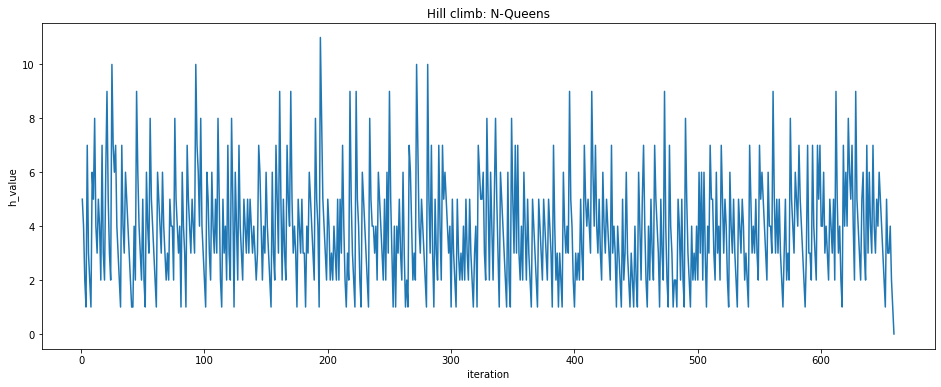

In [ ]:
#ploting the genetic algorithm process

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(16,6))
x=rec_iter
y=rec_h
plt.title("Hill climb: N-Queens") 
plt.xlabel("iteration") 
plt.ylabel("h_value") 
plt.plot(x,y) 
plt.show()